# Melbourne_House_Price_Prediction

In [1]:
import pandas as pd
from sklearn import linear_model

In [2]:
# Import data
mel = pd.read_csv('C://Users//fergu//Melbourne_housing_FULL.csv')

In [3]:
# Quick look
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
# No. of rows and cols
mel.shape

(34857, 21)

In [5]:
# Check for null values
mel.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
# Check shape of df with no nulls
mel.dropna(how='any').shape

(8887, 21)

In [7]:
# Remove all rows containing null values
mel.dropna(inplace=True)

In [8]:
mel.shape

(8887, 21)

In [9]:
# Remove address as each property has a unique one
mel.drop('Address', axis=1, inplace=True)

In [10]:
# Check data types
mel.dtypes

Suburb            object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [11]:
# Define a df containing only the cols whose type is 'object'
mel_obj = mel.select_dtypes(include=['object'])

In [12]:
# Take a look
mel_obj.head()

,Suburb,Type,Method,SellerG,Date,CouncilArea,Regionname
2,Abbotsford,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
4,Abbotsford,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
6,Abbotsford,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan
11,Abbotsford,h,S,Nelson,7/05/2016,Yarra City Council,Northern Metropolitan
14,Abbotsford,h,S,Nelson,8/10/2016,Yarra City Council,Northern Metropolitan


In [13]:
# Define a df containing only the cols whose type is 
# anything other than 'object' - i.e. numerical fields
mel_other = mel.drop(mel_obj.columns, axis=1)

In [14]:
mel_other.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
6,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0
11,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.8024,144.9993,4019.0
14,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.8060,144.9954,4019.0


In [15]:
# Create dummy fields for object columns
mel_obj_dum = pd.get_dummies(mel_obj)

In [16]:
mel_obj_dum.head()

,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
14,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [17]:
# Concatenate the dummy and numerical dfs
mel_final = pd.concat([mel_obj_dum, mel_other], axis=1)

In [18]:
mel_final.shape

(8887, 704)

In [19]:
# Define the input and outcome dataframes
X = mel_final.drop(['Price'], axis=1)
Y = mel_final['Price']

In [20]:
# Fit a linear regression model
lr = linear_model.LinearRegression()
lr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Compute accuracy score
lr.score(X, Y)

0.75649272089494035

In [83]:
# Try KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X,Y)

In [88]:
# Compute accuracy score
knn.score(X,Y)

0.76651688558065678

In [43]:
# Gradient boosting too slow

## params = {'n_estimators': 50,
##           'max_depth': 10,
##           'loss': 'deviance'}
## 
## #start_time = time.time()
## clf = ensemble.GradientBoostingClassifier(**params)
## clf.fit(X, Y)
## 
## clf.score(X,Y)

In [47]:
# Fit Random Forest
from sklearn import ensemble
rfr = ensemble.RandomForestRegressor(n_estimators=250)
rfr.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
# Compute accuracy score
rfr.score(X,Y)

0.97615461336033982

In [49]:
# Try training and test groups
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [50]:
# Fit model to taining data
rfr.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [51]:
# Compute accuracy score on training data
rfr.score(X_train,Y_train)

0.9750798754360861

In [52]:
# Compute accuracy score on test data
rfr.score(X_test,Y_test)

0.8573486506508663

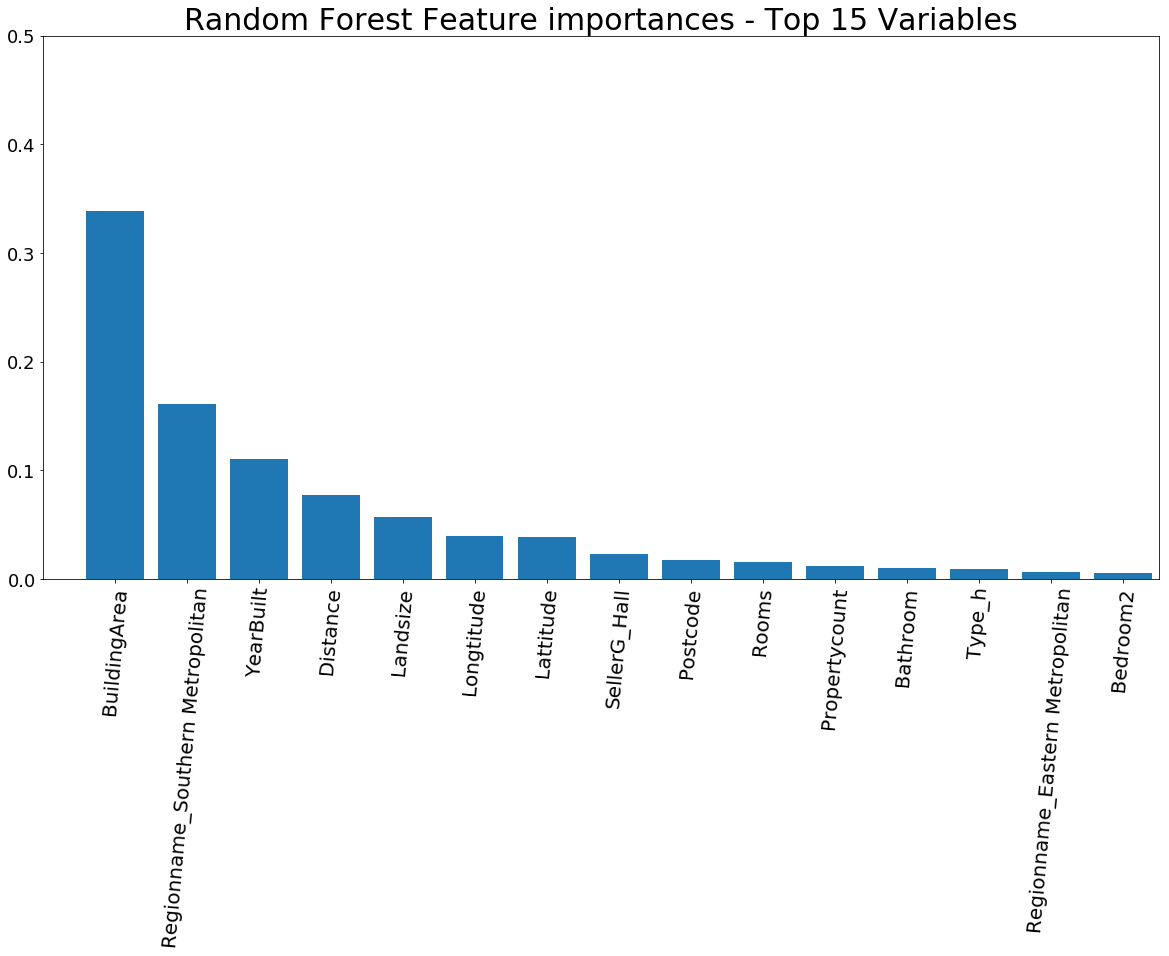

In [42]:
# Display feature importances

import matplotlib.pyplot as plt
import numpy as np

importances = rfr.feature_importances_
std = np.std([rfr.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.figure()
plt.title("Random Forest Feature importances - Top 15 Variables", fontsize=30)
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=85, fontsize=20)
plt.yticks(fontsize=18)
plt.xlim([-1, 14.5])
plt.ylim([0, 0.5])
plt.show()